In [3]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
from scipy.optimize import curve_fit

Estrazione dei dati dal file di testo

In [4]:
file = np.loadtxt('bubble2.txt')

colonna1 = file[:, 0]  # Prima colonna
colonna2 = file[:, 1]  # Seconda colonna

time_data = colonna1.tolist()
pos_data = colonna2.tolist()

Definizione degli errori sulla posizione

In [5]:
err_pos = np.full(len(pos_data), 5.e-4)

Fit dell'equazione del moto

In [6]:
def fit_func2(t, a, b, c, d):
    return a * t - b*np.exp(-c*t) - d

In [7]:
initial_guess2 = [1., 1., 1., 1.]
params2, covariance2 = curve_fit(fit_func2, colonna1, colonna2, sigma = err_pos, p0 = initial_guess2, maxfev = 100000)

In [8]:
par_err = np.sqrt(np.diag(covariance2))

Plot del fit

In [9]:
y2 = fit_func2(np.array(time_data), *params2)

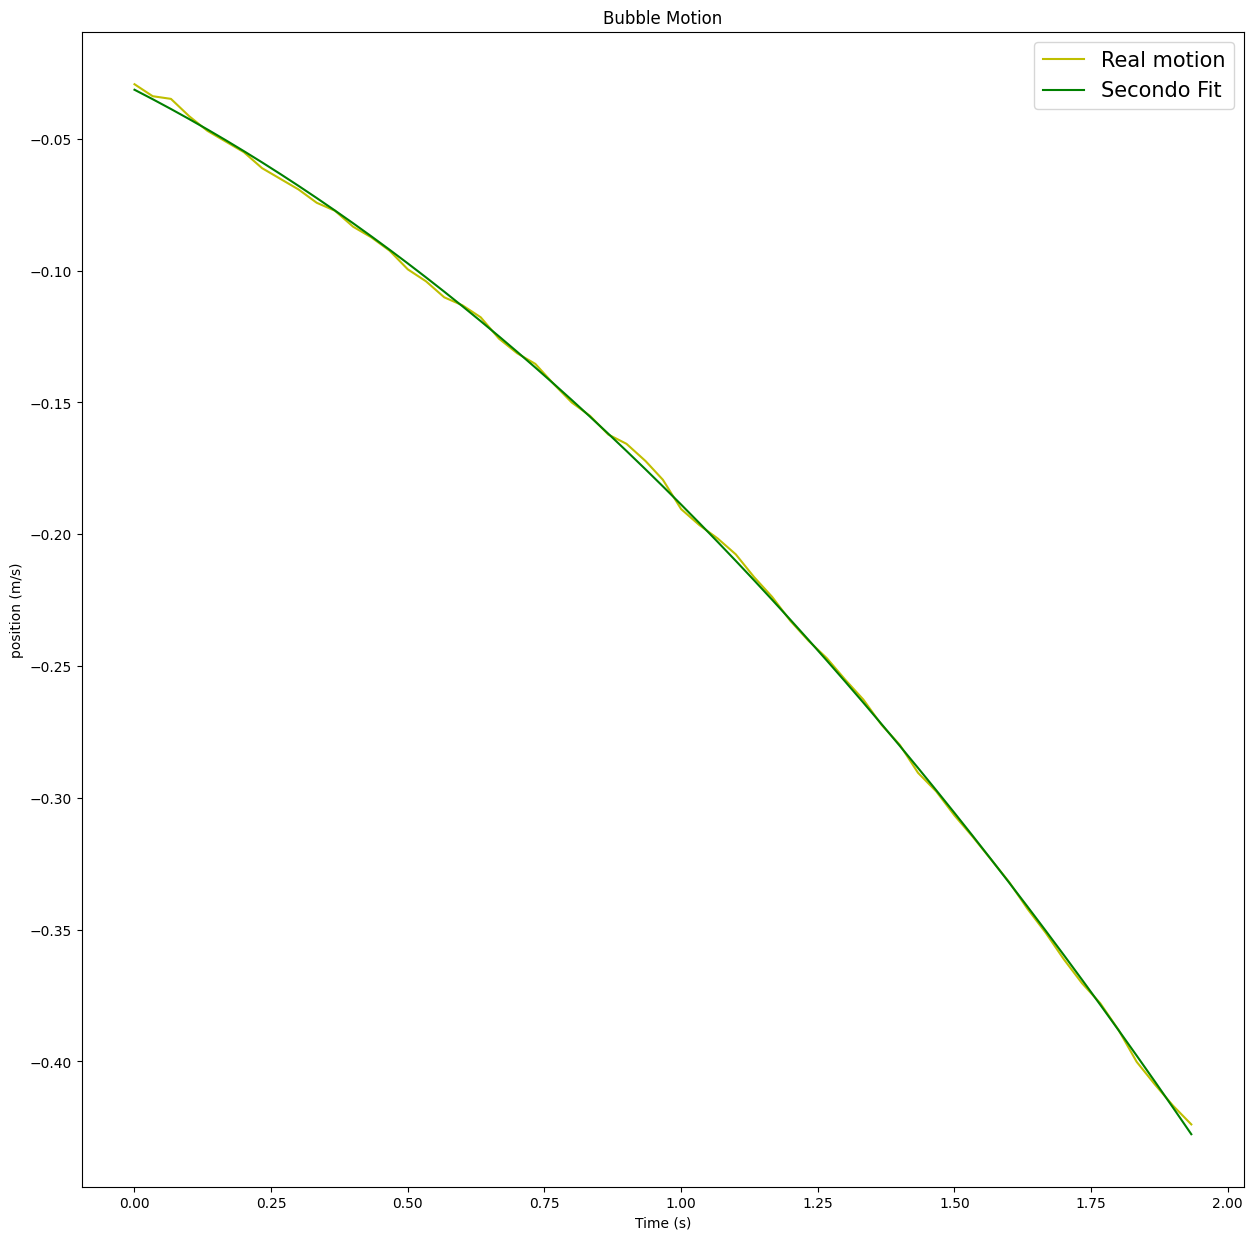

In [10]:
fig, plot = plt.subplots(figsize = (15, 15))

plot.set_title('Bubble Motion')
plot.set_xlabel('Time (s)')
plot.set_ylabel('position (m/s)')

plot.plot(np.array(time_data), np.array(pos_data), c = 'y', label = 'Real motion')
plot.plot(time_data, y2, label = 'Secondo Fit', c = 'g')
plot.legend(fontsize = 15)

Stampa dei parametri del fit

In [11]:
print('Parametro 1 = '+ str(params2[0]) + ' +/- ' + str(par_err[0]))
print('Parametro 2 = '+ str(params2[1]) + ' +/- ' + str(par_err[1]))
print('Parametro 3 = '+ str(params2[2]) + ' +/- ' + str(par_err[2]))
print('Parametro 4 = '+ str(params2[3]) + ' +/- ' + str(par_err[3]))

Parametro 1 = -13.02508809525669 +/- 107.1211059603202
Parametro 2 = 1624.3950973079916 +/- 27042.14998307505
Parametro 3 = 0.007953101103184063 +/- 0.0664557983164027
Parametro 4 = -1624.3637008049145 +/- 27042.15049079893


Calcolo della velocità di impatto

In [12]:
t = sp.symbols('t')
y = params2[0]*t - params2[1]*sp.exp(-params2[2]*t) + params2[3]
v = sp.diff(y, t)
v_0 = abs(v.subs({t: time_data[0]}))
print('Final velocity: ' + str(abs(v.subs({t: time_data[-1]}))) + ' m/s ')
print('Initial velocity: ' + str(abs(v.subs({t: time_data[0]}))) + ' m/s ')

Final velocity: 0.303242529646523 m/s 
Initial velocity: 0.106109654849719 m/s 


Stampa del tempo di volo

In [13]:
print('Tempo di volo: ' + str(  time_data[-1]) + ' s ')

Tempo di volo: 1.933433 s 


Stima della densità della bolla dai parametri del fit

In [14]:
g, n, r, d_b, d_a, v_i, z_0, a, b, c, d= sp.symbols('g, n, r, d_b, d_a, v_i, z_0, a, b, c, d')
values = {'g': 9.81, 'n': 1.71e-5, 'r': 0.04, 'd_a': 1.23, 'v_i': v_0, 'z_0': pos_data[0], 'a': params2[0], 'b': params2[1], 'c': params2[2], 'd': params2[3]}
equation1 = 2 * g * r**2 * (d_b - d_a) / (9 * n) - a
equation2 = (2*v_i * r**2 * d_b / (9*n)) - (4*g * r**4 * d_b * (d_b - d_a)/ (81 * n)) - b
equation2 = equation2.simplify()
equation3 = 9 * n /(r**2 * d_b) - c
equation4 = abs(pos_data[-1]) + (2*v_i * r**2 * d_b / (9*n)) + (4*g * r**4 * d_b * (d_b - d_a) / (81 * n)) - d

In [15]:
sol1 = sp.solve(equation1, d_b)
d_b1 = sol1[0].subs(values)
print('d_b1: ' + str(d_b1) + ' kg/m^3')

d_b1: 1.16614420687245 kg/m^3


In [16]:
sol2 = sp.solve(equation2, d_b)
d_b2_a = sol2[0].subs(values)
d_b2_b = sol2[1].subs(values)
print('d_b2_a: ' + str(d_b2_a) + ' kg/m^3')
print('d_b2_b: ' + str(d_b2_b) + ' kg/m^3')

d_b2_a: 15.8256730002465 - 148.819586484958*I kg/m^3
d_b2_b: 15.8256730002465 + 148.819586484958*I kg/m^3


In [17]:
sol3 = sp.solve(equation3, d_b)
d_b3 = sol3[0].subs(values)
print('d_b3: ' + str(d_b3) + ' kg/m^3')

d_b3: 12.0943388939807 kg/m^3


In [18]:
sol4 = sp.solve(equation4, d_b)
d_b4_a = sol4[0].subs(values)
d_b4_b = sol4[1].subs(values)
print('d_b4_a: ' + str(d_b4_a) + ' kg/m^3')
print('d_b4_b: ' + str(d_b4_b) + ' kg/m^3')

d_b4_a: -14.5956730002465 - 148.96341625662*I kg/m^3
d_b4_b: -14.5956730002465 + 148.96341625662*I kg/m^3
